# 引力场建模

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def plot_vector_field(f, xmin, xmax, ymin, ymax, xstep=1, ystep=1):
    X, Y = np.meshgrid(np.arange(xmin, xmax, xstep), np.arange(ymin, ymax, ystep))
    U = np.vectorize(lambda x, y: f(x, y)[0])(X, Y)
    V = np.vectorize(lambda x, y: f(x, y)[1])(X, Y)
    plt.quiver(X, Y, U, V, color='red')
    fig = plt.gcf()
    fig.set_size_inches(7, 7)

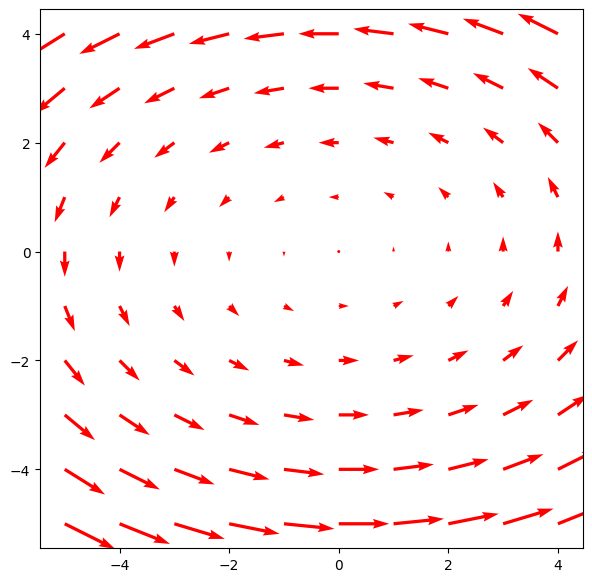

In [4]:
def f(x, y):
    return (-2 * y, x)


plot_vector_field(f, -5, 5, -5, 5)

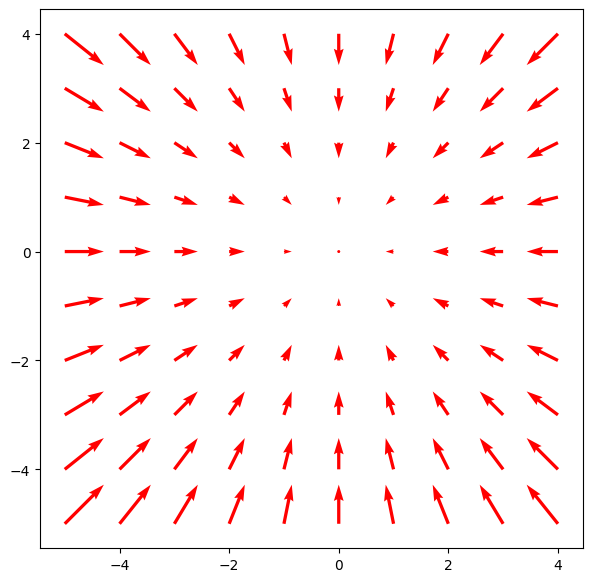

In [5]:
def black_hole_force(x, y):
    return -x, -y


plot_vector_field(black_hole_force, -5, 5, -5, 5)

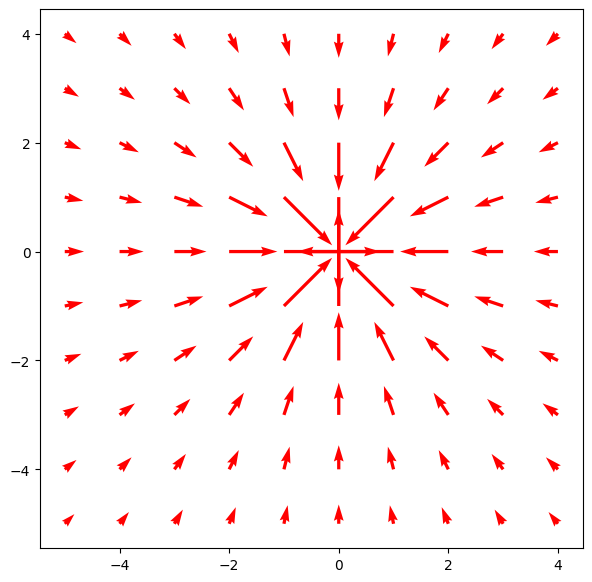

In [12]:
def black_hole_force(x, y):
    if x == 0 and y == 0:
        return 0, 0
    result_x = -x / (x ** 2 + y ** 2)
    result_y = -y / (x ** 2 + y ** 2)
    return result_x, result_y


plot_vector_field(black_hole_force, -5, 5, -5, 5)

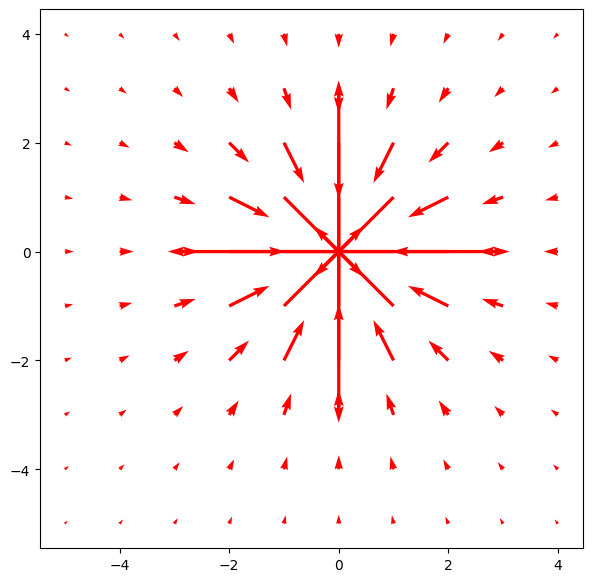

In [13]:
def improved_black_hole_force(x, y):
    if x == 0 and y == 0:
        return 0, 0

    distance = (x ** 2 + y ** 2) ** 0.5  # 计算欧几里得距离
    distance_cubed = distance ** 3  # 距离的立方

    # 根据实际引力公式 F = G*M*m/r^2，方向指向质量中心
    # 省略常数G、M和m，专注于随距离变化的部分
    force_magnitude = 1 / distance ** 2

    # 计算归一化的方向向量并乘以力的大小
    result_x = -x / distance * force_magnitude
    result_y = -y / distance * force_magnitude

    return result_x, result_y


plot_vector_field(improved_black_hole_force, -5, 5, -5, 5)

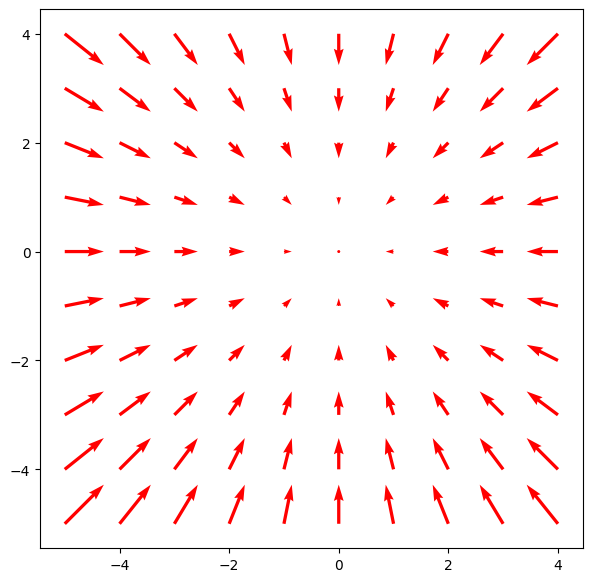

In [20]:
from py_lib import vectors


def gravitational_field(source, x, y):
    relative_position = (x - source.x, y - source.y)
    return vectors.scale(- source.gravity, relative_position)


class Plant:
    def __init__(self, x, y, gravity):
        self.x = x
        self.y = y
        self.gravity = gravity


def plant_gravitational_field(x, y):
    return gravitational_field(Plant(0, 0, 1), x, y)


plot_vector_field(plant_gravitational_field, -5, 5, -5, 5)